<a href="https://colab.research.google.com/github/mzfarhan/umamusume-analysis-project/blob/main/content_ratings_umamusume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# List of countries with their codes
countries = {
    "Afghanistan": "af", "Algeria": "dz", "Angola": "ao", "Argentina": "ar",
    "Australia": "au", "Austria": "at", "Bangladesh": "bd", "Belarus": "by",
    "Belgium": "be", "Belize": "bz", "Bolivia": "bo", "Bosnia And Herzegovina": "ba",
    "Botswana": "bw", "Brazil": "br", "Bulgaria": "bg", "Cambodia": "kh",
    "Cameroon": "cm", "Canada": "ca", "Chile": "cl", "China": "cn",
    "Colombia": "co", "Congo, The Democratic Republic Of The": "cd", "Costa Rica": "cr",
    "Croatia": "hr", "Cyprus": "cy", "Czech Republic": "cz", "Côte D'Ivoire": "ci",
    "Denmark": "dk", "Dominican Republic": "do", "Ecuador": "ec", "Egypt": "eg",
    "El Salvador": "sv", "Estonia": "ee", "Finland": "fi", "France": "fr",
    "Gabon": "ga", "Georgia": "ge", "Germany": "de", "Greece": "gr",
    "Guatemala": "gt", "Honduras": "hn", "Hong Kong": "hk", "Hungary": "hu",
    "Iceland": "is", "India": "in", "Indonesia": "id", "Iran, Islamic Republic Of": "ir",
    "Iraq": "iq", "Ireland": "ie", "Israel": "il", "Italy": "it",
    "Japan": "jp", "Jordan": "jo", "Kazakhstan": "kz", "Kenya": "ke",
    "Korea, Republic Of": "kr", "Kosovo": "xk", "Kuwait": "kw", "Lao People's Democratic Republic": "la",
    "Latvia": "lv", "Lebanon": "lb", "Libya": "ly", "Lithuania": "lt",
    "Luxembourg": "lu", "Macao": "mo", "Malawi": "mw", "Malaysia": "my",
    "Maldives": "mv", "Mexico": "mx", "Montenegro": "me", "Morocco": "ma",
    "Myanmar": "mm", "Nauru": "nr", "Netherlands": "nl", "New Zealand": "nz",
    "Nicaragua": "ni", "Nigeria": "ng", "Norway": "no", "Oman": "om",
    "Pakistan": "pk", "Panama": "pa", "Paraguay": "py", "Peru": "pe",
    "Philippines": "ph", "Poland": "pl", "Portugal": "pt", "Qatar": "qa",
    "Romania": "ro", "Russian Federation": "ru", "Rwanda": "rw", "Saudi Arabia": "sa",
    "Senegal": "sn", "Serbia": "rs", "Singapore": "sg", "Slovakia": "sk",
    "Slovenia": "si", "South Africa": "za", "Spain": "es", "Sri Lanka": "lk",
    "Sweden": "se", "Switzerland": "ch", "Taiwan": "tw", "Tanzania, United Republic Of": "tz",
    "Thailand": "th", "Tonga": "to", "Tunisia": "tn", "Turkey": "tr",
    "Uganda": "ug", "Ukraine": "ua", "United Arab Emirates": "ae", "United Kingdom": "gb",
    "United States": "us", "Uruguay": "uy", "Vanuatu": "vu", "Venezuela": "ve",
    "Vietnam": "vn", "Zambia": "zm", "Zimbabwe": "zw"
}

app_id = 'com.cygames.umamusume'
content_ratings = []
content_rating_descriptions = []

print(f"Collecting content ratings for {len(countries)} countries...")

for country_name, country_code in countries.items():
    try:
        result = app(
            app_id,
            lang='en',
            country=country_code
        )
        content_rating = result.get('contentRating')
        content_rating_description = result.get('contentRatingDescription')
        content_ratings.append({
            'country_code': country_code,
            'country_name': country_name,
            'content_rating': content_rating,
            'content_rating_description': content_rating_description
        })
        print(f"Collected rating for {country_name} ({country_code}): {content_rating}")
    except Exception as e:
        print(f"Error collecting rating for {country_name} ({country_code}): {e}")
        content_ratings.append({
            'country_code': country_code,
            'country_name': country_name,
            'content_rating': None, # Append None if there's an error
            'content_rating_description': None # Error occurred while collecting rating
        })

# Create a DataFrame
df_content_ratings = pd.DataFrame(content_ratings)

# Display the DataFrame
print("\n--- Content Ratings and description by Country ---")
display(df_content_ratings)

Collected rating for Afghanistan (af): Rated for 3+
Collected rating for Algeria (dz): Rated for 3+
Collected rating for Angola (ao): Rated for 3+
Collected rating for Argentina (ar): Teen
Collected rating for Australia (au): Mature
Collected rating for Austria (at): PEGI 3
Collected rating for Bangladesh (bd): Rated for 3+
Collected rating for Belarus (by): Rated for 3+
Collected rating for Belgium (be): PEGI 3
Collected rating for Belize (bz): Teen
Collected rating for Bolivia (bo): Teen
Collected rating for Bosnia And Herzegovina (ba): PEGI 3
Collected rating for Botswana (bw): Rated for 3+
Collected rating for Brazil (br): Rated 18+
Collected rating for Bulgaria (bg): PEGI 3
Collected rating for Cambodia (kh): Rated for 3+
Collected rating for Cameroon (cm): Rated for 3+
Collected rating for Canada (ca): Teen
Collected rating for Chile (cl): Teen
Collected rating for China (cn): Rated for 3+
Collected rating for Colombia (co): Teen
Collected rating for Congo, The Democratic Republi

,country_code,country_name,content_rating,content_rating_description
0,af,Afghanistan,Rated for 3+,None
1,dz,Algeria,Rated for 3+,None
2,ao,Angola,Rated for 3+,None
3,ar,Argentina,Teen,"Suggestive Themes, Gambling Themes"
4,au,Australia,Mature,"Sexualised Imagery, Gambling Themes"
...,...,...,...,...
113,vu,Vanuatu,Rated for 3+,None
114,ve,Venezuela,Teen,"Suggestive Themes, Gambling Themes"
115,vn,Vietnam,Rated for 3+,None
116,zm,Zambia,Rated for 3+,None


/tmp/ipython-input-3196666043.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='count', y='content_rating', data=rating_counts, palette=sns.color_palette('Dark2'))
/tmp/ipython-input-3196666043.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  ax = sns.barplot(x='count', y='content_rating', data=rating_counts, palette=sns.color_palette('Dark2'))


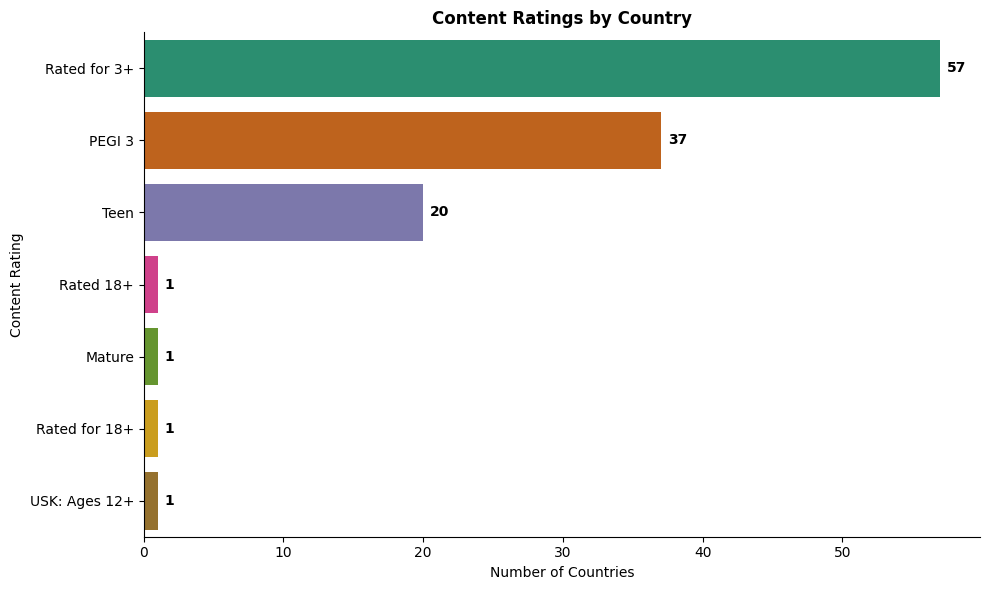

In [6]:
# Ensure df_content_ratings is available and not empty
if 'df_content_ratings' in locals() and not df_content_ratings.empty:
    # Group by content_rating and count the occurrences
    rating_counts = df_content_ratings.groupby('content_rating').size().reset_index(name='count')

    # Sort for better visualization (optional, but often helpful)
    rating_counts = rating_counts.sort_values('count', ascending=False)

    plt.figure(figsize=(10, 6)) # Adjust figure size if needed
    ax = sns.barplot(x='count', y='content_rating', data=rating_counts, palette=sns.color_palette('Dark2'))

    plt.title('Content Ratings by Country',fontweight='bold')
    plt.xlabel('Number of Countries')
    plt.ylabel('Content Rating') # Change y-axis label here
    plt.gca().spines[['top', 'right']].set_visible(False)

    # Add annotations to the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='bold', padding=5) # Add bold annotations and padding

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("DataFrame df_content_ratings not found or is empty.")